* Course: DSC630
* Title: Assignment 3.2
* Author Nels Findley
* 9/28/2025
* Description: Using Data to Improve MLB Attendance

This attendance analysis reveals that temperature and the day of the week are the primary drivers of fan turnout. Our data shows a clear increase for attendance between $70^{\circ}$F and $79^{\circ}$F, where peak crowds are achieved. Colder temperatures, specifically the $50^{\circ}$F to $64^{\circ}$F range, create a significant attendance barrier, leading to our lowest averages. While attendance jumps sharply once the temperature hits $65^{\circ}$F, the trend reverses in extreme heat, with a notable drop-off in the $80^{\circ}$F to $89^{\circ}$F range. The exception lies in the $95^{\circ}$F and over bracket, where an unexpected attendance bump suggests that for high-stakes games, fans are willing to tolerate the heat. More data will be needed to prove this point. The dataset is missing team ranking that can clear up this unexpected attendance. Crucially, the day of the week dictates inherent demand: Mondays consistently have the lowest attendance, while Tuesdays surprisingly emerged as the most popular day, with weekends also performing strongly. To maximize the stadium's capacity, promotional efforts should be strategically focused on cold-weather and low-demand weekday games to combat these attendance deficits.

In [6]:
# Setup libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# load dataset and view it
df = pd.read_csv('dodgers-2022.csv')
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


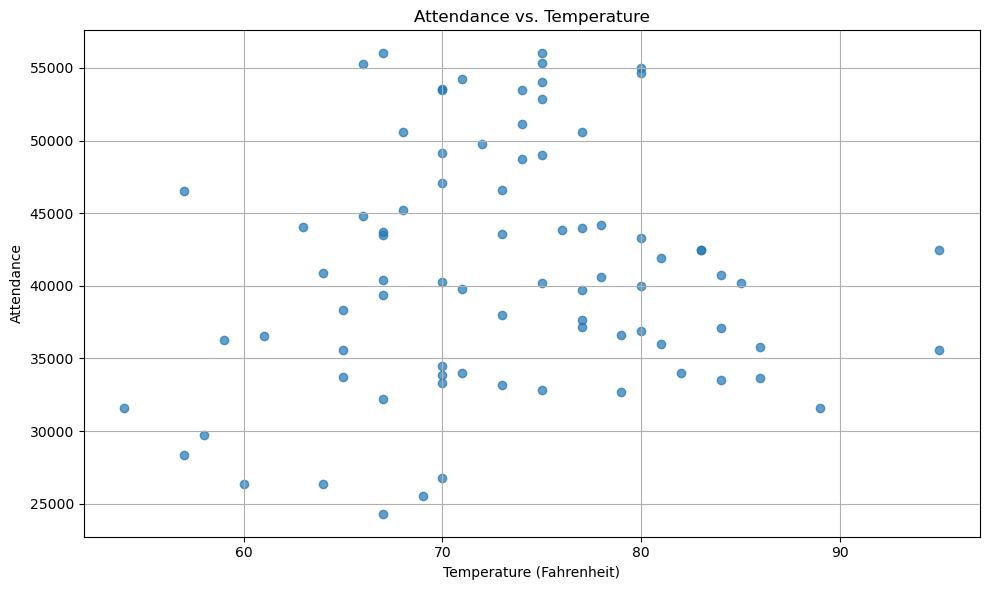

In [9]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['attend'], alpha=0.7)
plt.title('Attendance vs. Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Attendance')
plt.grid(True)
plt.tight_layout()

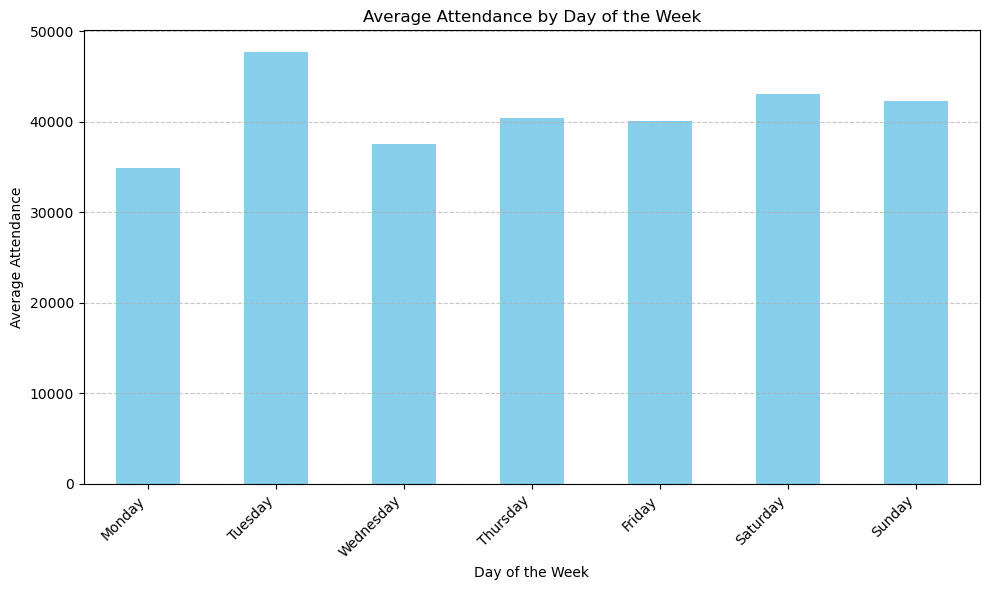

In [12]:
# Create graph to find each days atttendance avg count

# Define the order of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the average attendance for each day of the week
avg_attend_by_day = df.groupby('day_of_week')['attend'].mean().reindex(day_order)

# Create the bar chart
plt.figure(figsize=(10, 6))
avg_attend_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Average Attendance by Temperature Range:
 temp_range_final
50-54 F          31601
55-59 F          35222
60-64 F          34840
65-69 F          40575
70-74 F          43226
75-79 F          43952
80-84 F          41386
85-89 F          35288
95 F and over    39028
Name: attend, dtype: int32


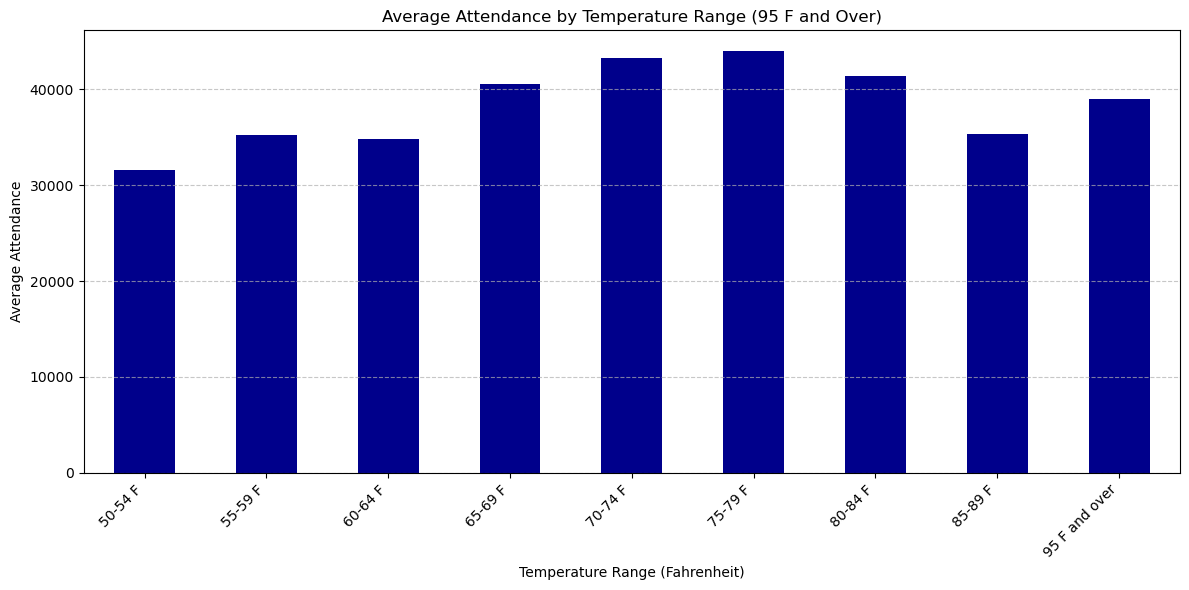

In [21]:
# Create bar chart to find average attendance by temperature range.

# Create bins and labels
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 1000]
labels = ['50-54 F', '55-59 F', '60-64 F', '65-69 F', '70-74 F', '75-79 F',
          '80-84 F', '85-89 F', '90-94 F', '95 F and over']
df['temp_range_final'] = pd.cut(df['temp'], bins=bins, labels=labels, right=False, include_lowest=True)

# Find average attendance by temperature
avg_attend_by_temp_final = df.groupby('temp_range_final', observed=True)['attend'].mean().round(0)

# Create the bar chart
plt.figure(figsize=(12, 6))
avg_attend_by_temp_final .plot(kind='bar', color='darkblue')
plt.title('Average Attendance by Temperature Range (95 F and Over)')
plt.xlabel('Temperature Range (Fahrenheit)')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Print the results
print("Average Attendance by Temperature Range:\n", avg_attend_by_temp_final.astype(int))